<h1>Data Science Capstone Project</h1>

<p>Created by Bradley Jones</p>

<p>Public Link to Notebook: https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/454c3952-8bad-4709-a9d8-fc3492ddba92/view?access_token=60ccef45aad1c64863081cbb46bf1fdab7866acb0069ed0dedd0ab2d5ac07a70</p>

<h2>Capstone Idea: Investigate the Most Popular Food-Venue Types Near Subway Stations in Toronto and Conclude on Possible Locations for Expansion</h2>

In [47]:
#Importing required libraries
import pandas as pd
import numpy as np
! pip install folium==0.5.0
import folium # plotting library
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import json, requests
from matplotlib import cm
from matplotlib import colors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print("Libraries installed!")

Libraries installed!


<p>Create Dataframe for  Bloor subway stations and their latitude and longitude</p>

In [2]:
#Bloor-Danforth Line
Bloor = pd.read_csv('http://scruss.com/wordpress/wp-content/bloor-danforth-NAD83.csv')
Bloor.head()

,43.638020312,-79.536388119,Kipling
0,43.645950,-79.523948,Islington
1,43.648804,-79.511541,Royal York
2,43.650576,-79.495225,Old Mill
3,43.650291,-79.484772,Jane
4,43.652167,-79.476499,Runnymede


<p>Clean Bloor subway data</p>

In [3]:
Bloor.columns = ['Latitude', 'Longitude', 'Station']
new_row = pd.DataFrame({'Latitude':43.638020312, 'Longitude':-79.536388119, 'Station':'Kipling'}, index =[0]) 
Bloor = pd.concat([new_row, Bloor]).reset_index(drop = True) 
Bloor.head()

,Latitude,Longitude,Station
0,43.638020,-79.536388,Kipling
1,43.645950,-79.523948,Islington
2,43.648804,-79.511541,Royal York
3,43.650576,-79.495225,Old Mill
4,43.650291,-79.484772,Jane


<p>Repeat for three other Toronto subway lines</p>

In [4]:
#Yongue-University-Spadina Line
Yonge = pd.read_csv('http://scruss.com/wordpress/wp-content/yonge-university-spadina-NAD83.csv')
Yonge.columns = ['Latitude', 'Longitude', 'Station']
new_row = pd.DataFrame({'Latitude':43.750053813, 'Longitude':-79.462342744, 'Station':'Downsview'}, index =[0]) 
Yonge = pd.concat([new_row, Yonge]).reset_index(drop = True) 
Yonge.head()

,Latitude,Longitude,Station
0,43.750054,-79.462343,Downsview
1,43.734581,-79.449929,Wilson
2,43.724813,-79.447509,Yorkdale
3,43.716381,-79.444029,Lawrence West
4,43.709820,-79.441528,Glencairn


In [5]:
#Sheppard Line
Sheppard = pd.read_csv('http://scruss.com/wordpress/wp-content/sheppard-yonge-NAD83.csv')
Sheppard.columns = ['Latitude', 'Longitude', 'Station']
new_row = pd.DataFrame({'Latitude':	43.761618114, 'Longitude':-79.410988637, 'Station':'Sheppard-Yonge'}, index =[0]) 
Sheppard = pd.concat([new_row, Sheppard]).reset_index(drop = True) 
Sheppard.head()

,Latitude,Longitude,Station
0,43.761618,-79.410989,Sheppard-Yonge
1,43.767252,-79.387399,Bayview
2,43.769127,-79.376724,Bessarion
3,43.771132,-79.367416,Leslie
4,43.775565,-79.346936,Don Mills


In [6]:
#Scarborough Line
Scarborough = pd.read_csv('http://scruss.com/wordpress/wp-content/srt-NAD83.csv')
Scarborough.columns = ['Latitude', 'Longitude', 'Station']
new_row = pd.DataFrame({'Latitude':43.732191651, 'Longitude':-79.265696324, 'Station':'Kennedy'}, index =[0]) 
Scarborough = pd.concat([new_row, Scarborough]).reset_index(drop = True) 
Scarborough.head()

,Latitude,Longitude,Station
0,43.732192,-79.265696,Kennedy
1,43.750215,-79.270907,Lawrence East
2,43.767226,-79.277315,Ellesmere
3,43.770168,-79.272482,Midland
4,43.773844,-79.257863,Scarborough Centre


In [7]:
#Display shape of Subway Line Dataframes
print(Bloor.shape)
print(Yonge.shape)
print(Sheppard.shape)
print(Scarborough.shape)

(31, 3)
(32, 3)
(5, 3)
(6, 3)


In [8]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add Bloor line markers to map
for lat, lng, station in zip(Bloor['Latitude'], Bloor['Longitude'], Bloor['Station']):
    label = '{}, {}'.format('Bloor Line', station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

    
# add Yonge line markers to map    
for lat, lng, station in zip(Yonge['Latitude'], Yonge['Longitude'], Yonge['Station']):
    label = '{}, {}'.format('Yonge Line', station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#ffa500',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)   
    

# add Sheppard line markers to map    
for lat, lng, station in zip(Sheppard['Latitude'], Sheppard['Longitude'], Sheppard['Station']):
    label = '{}, {}'.format('Sheppard Line', station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#800080',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 

# add Scarborough line markers to map    
for lat, lng, station in zip(Scarborough['Latitude'], Scarborough['Longitude'], Scarborough['Station']):
    label = '{}, {}'.format('Scarborough Line', station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='gray',
        fill=True,
        fill_color='#808080',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
    
map_toronto

<p>Remove overlapping stations to not skew data</p>

In [9]:
#removing the overlapping Bloor-Yonge Stations
Yonge=Yonge[~Yonge.Station.str.contains("Spadina")]
Yonge=Yonge[~Yonge.Station.str.contains("St George")]
Yonge=Yonge[~Yonge.Station.str.contains("Bloor")]

#removing the overlapping Yonge-Sheppard Stations
Sheppard=Sheppard[~Sheppard.Station.str.contains("Sheppard-Yonge")]

#removing the overlapping Bloor-Scarborough Stations
Scarborough=Scarborough[~Scarborough.Station.str.contains("Kennedy")]

<p>Check map with updated Dataframes</p>

In [10]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add Bloor line markers to map
for lat, lng, station in zip(Bloor['Latitude'], Bloor['Longitude'], Bloor['Station']):
    label = '{}, {}'.format('Bloor Line', station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

    
# add Yonge line markers to map    
for lat, lng, station in zip(Yonge['Latitude'], Yonge['Longitude'], Yonge['Station']):
    label = '{}, {}'.format('Yonge Line', station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#ffa500',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)   
    

# add Sheppard line markers to map    
for lat, lng, station in zip(Sheppard['Latitude'], Sheppard['Longitude'], Sheppard['Station']):
    label = '{}, {}'.format('Sheppard Line', station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#800080',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 

# add Scarborough line markers to map    
for lat, lng, station in zip(Scarborough['Latitude'], Scarborough['Longitude'], Scarborough['Station']):
    label = '{}, {}'.format('Scarborough Line', station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='gray',
        fill=True,
        fill_color='#808080',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
    
map_toronto

<p>Updated map no longer contains overlapping stations</p>

In [11]:
#Create master dataframe for all subway stations
all_stations = pd.concat([Bloor, Yonge, Sheppard, Scarborough]).reset_index(drop = True) 
all_stations

,Latitude,Longitude,Station
0,43.638020,-79.536388,Kipling
1,43.645950,-79.523948,Islington
2,43.648804,-79.511541,Royal York
3,43.650576,-79.495225,Old Mill
4,43.650291,-79.484772,Jane
...,...,...,...
64,43.750215,-79.270907,Lawrence East
65,43.767226,-79.277315,Ellesmere
66,43.770168,-79.272482,Midland
67,43.773844,-79.257863,Scarborough Centre


<p>Get popular food venues around the first station</p>

In [12]:
#declare Foursquare credentials for api calls
CLIENT_ID = 'UXO32SQMRAC1EF2VAME4F0QVLT0VLQZOJY0T3GYSODUBSMAJ' # your Foursquare ID
CLIENT_SECRET = 'B2KIOLKGVN2NB4TZQODWJLEBANLKUS0BOHVC25ORZVEWH3AT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 10 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UXO32SQMRAC1EF2VAME4F0QVLT0VLQZOJY0T3GYSODUBSMAJ
CLIENT_SECRET:B2KIOLKGVN2NB4TZQODWJLEBANLKUS0BOHVC25ORZVEWH3AT


In [13]:

radius = 250# define radius
sortByPop=1
categoryId='4d4b7105d754a06374d81259'

# create URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&sortByPopularity={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    all_stations.loc[0, 'Latitude'], 
    all_stations.loc[0, 'Longitude'], 
    radius, 
    LIMIT,
   sortByPop,
categoryId)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=UXO32SQMRAC1EF2VAME4F0QVLT0VLQZOJY0T3GYSODUBSMAJ&client_secret=B2KIOLKGVN2NB4TZQODWJLEBANLKUS0BOHVC25ORZVEWH3AT&v=20180605&ll=43.638020312,-79.536388119&radius=250&limit=10&sortByPopularity=1&categoryId=4d4b7105d754a06374d81259'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ffe35bdcfd9f229e018ee39'},
 'response': {'venues': [{'id': '4b26faaaf964a520aa8324e3',
    'name': 'Starbucks',
    'location': {'address': '5230 Dundas St W',
     'crossStreet': 'at Six Points Plaza',
     'lat': 43.640187,
     'lng': -79.538053,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.640187,
       'lng': -79.538053}],
     'distance': 275,
     'postalCode': 'M9B 1A8',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['5230 Dundas St W (at Six Points Plaza)',
      'Toronto ON M9B 1A8',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1610495421',
    'hasPerk': False},
   {'id': '4adc0

<p>Clean the venue data retrieved from the Foursquare API</p>

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['venues']
#venues
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Starbucks,Coffee Shop,43.640187,-79.538053
1,Apache Burger,Burger Joint,43.639257,-79.537725
2,Tim Hortons,Coffee Shop,43.638374,-79.538893
3,Wendy's,Fast Food Restaurant,43.638372,-79.538910
4,Pho House,Vietnamese Restaurant,43.639528,-79.537217


<p>Map the first subway station and it's nearby food venues</p>

In [17]:
tempLat=all_stations.loc[0,'Latitude']
tempLng=all_stations.loc[0,'Longitude']
templabel = '{}, {}'.format('Station:', all_stations.loc[0,'Station'])

# create map of first Station using latitude and longitude values
map_station = folium.Map(location=[tempLat, tempLng], zoom_start=15)

#add station marker
folium.CircleMarker(
        [tempLat, tempLng],
        radius=3,
        popup=templabel,
        color='black',
        fill=True,
        fill_color='#FFFFFF',
        fill_opacity=0.7,
        parse_html=False).add_to(map_station)  

# add food venue markers to map
for lat, lng, name, cat in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = '{}, {}'.format(cat, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='gray',
        fill=True,
        fill_color='#d3d3d3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_station)  




map_station

<p>Update map to color code same venue categories</p>

In [18]:

# create map
map_categories = folium.Map(location=[tempLat, tempLng], zoom_start=15)

# set color scheme for the categories
x = np.arange(nearby_venues['categories'].nunique())
ys = [i + x + (i*x)**2 for i in range(nearby_venues['categories'].nunique())]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

hold = nearby_venues.categories.unique()

templabel = '{}, {}'.format('Station:', all_stations.loc[0,'Station'])


#add station marker
folium.CircleMarker(
        [tempLat, tempLng],
        radius=3,
        popup=templabel,
        color='black',
        fill=True,
        fill_color='#FFFFFF',
        fill_opacity=0.7,
        parse_html=False).add_to(map_categories)  



# add markers to the map
markers_colors = []
for lat, lon, name, cat in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = folium.Popup(cat+ ', ' + name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[np.where(hold == cat)[0][0]],
        fill=True,
        fill_color=rainbow[np.where(hold == cat)[0][0]],
        fill_opacity=0.7).add_to(map_categories)
       
map_categories

In [19]:
#Function that will get the popular venues near each subway station
def getNearbyVenues(stations, latitudes, longitudes, radius=250):
    
    venues_list=[]
    sortByPop=1
    categoryId='4d4b7105d754a06374d81259'
    LIMIT=10
    for station, lat, lng in zip(stations, latitudes, longitudes):
        print(station)
            
    

        # create URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&sortByPopularity={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT,
        sortByPop,
        categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        # return only relevant information for each nearby venue
        venues_list.append([(
            station, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories'][0]['name']) for v in results])

    station_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    station_venues.columns = ['Station', 
                  'StationLat', 
                  'StationLong', 
                  'Venue', 
                  'VenueLat', 
                  'VenueLong', 
                  'VenueCategory']
    
    return(station_venues)

In [20]:
station_venues = getNearbyVenues(stations=all_stations['Station'],
                                   latitudes=all_stations['Latitude'],
                                   longitudes=all_stations['Longitude']
                                  )

Kipling
Islington
Royal York
Old Mill
Jane
Runnymede
High Park
Keele
Dundas West
Lansdowne
Dufferin
Ossington
Christie
Bathurst
Spadina
St George
Bay
Yonge
Sherbourne
Castle Frank
Broadview
Chester
Pape
Donlands
Greenwood
Coxwell
Woodbine
Main Street
Victoria Park
Warden
Kennedy
Downsview
Wilson
Yorkdale
Lawrence West
Glencairn
Eglinton West
St Clair West
Dupont
Museum
Queen's Park
St Patrick
Osgoode
St Andrew
Union
King
Queen
Dundas
College
Wellesley
Rosedale
Summerhill
St Clair
Davisville
Eglinton
Lawrence
York Mills
Sheppard
North York Centre
Finch
Bayview
Bessarion
Leslie
Don Mills
Lawrence East
Ellesmere
Midland
Scarborough Centre
McCowan


<p>The station_venues Dataframe contains the top 10 food venues within 250 meter radius for each station</p>

In [21]:
print(station_venues.shape)
station_venues.head()

(586, 7)


,Station,StationLat,StationLong,Venue,VenueLat,VenueLong,VenueCategory
0,Kipling,43.63802,-79.536388,Starbucks,43.640187,-79.538053,Coffee Shop
1,Kipling,43.63802,-79.536388,Apache Burger,43.639257,-79.537725,Burger Joint
2,Kipling,43.63802,-79.536388,Tim Hortons,43.638374,-79.538893,Coffee Shop
3,Kipling,43.63802,-79.536388,Wendy's,43.638372,-79.538910,Fast Food Restaurant
4,Kipling,43.63802,-79.536388,Pho House,43.639528,-79.537217,Vietnamese Restaurant


<p>Create new map displaying the colour coded venue categories for all stations</p>

In [22]:

# create map
full_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the categories
x = np.arange(station_venues['VenueCategory'].nunique())
ys = [i + x + (i*x)**2 for i in range(station_venues['VenueCategory'].nunique())]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

hold = station_venues['VenueCategory'].unique()



# add markers to the map
markers_colors = []
for lat, lon, name, cat in zip(station_venues['VenueLat'], station_venues['VenueLong'], station_venues['Venue'], station_venues['VenueCategory']):
    label = folium.Popup(cat+ ', ' + name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[np.where(hold == cat)[0][0]],
        fill=True,
        fill_color=rainbow[np.where(hold == cat)[0][0]],
        fill_opacity=0.7).add_to(full_map)
       
        
for lat, lon, station in zip(all_stations['Latitude'], all_stations['Longitude'], all_stations['Station']):
    label = folium.Popup(station, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color='black',
        fill=True,
        fill_color='#FFFFF',
        fill_opacity=0.7).add_to(full_map)

        
        
full_map

<p>Display the number of different food venue categories</p>

In [23]:
print('There are {} uniques categories.'.format(len(station_venues['VenueCategory'].unique())))

There are 89 uniques categories.


<p>One-hot encode the data to prepare for easy access to cumulative popularity of food-venue types at subway stations</p>

In [24]:
# one hot encoding
venue_onehot = pd.get_dummies(station_venues[['VenueCategory']], prefix="", prefix_sep="")

# add Station column back to dataframe
venue_onehot['Station'] = station_venues['Station'] 

# move Station column to the first column
fixed_columns = [venue_onehot.columns[-1]] + list(venue_onehot.columns[:-1])
venue_onehot = venue_onehot[fixed_columns]

venue_onehot.head()

,Station,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Breakfast Spot,...,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Turkish Home Cooking Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Kipling,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kipling,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kipling,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kipling,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kipling,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
venue_onehot.shape

(586, 90)

<p>Get relative frequency of each food-venue type</p>

In [26]:
all_venue_onehot=venue_onehot.mean().reset_index()
all_venue_onehot.head(10)

,index,0
0,African Restaurant,0.005119
1,American Restaurant,0.013652
2,Asian Restaurant,0.006826
3,BBQ Joint,0.005119
4,Bagel Shop,0.005119
5,Bakery,0.039249
6,Bar,0.005119
7,Beer Bar,0.001706
8,Breakfast Spot,0.013652
9,Bubble Tea Shop,0.018771


<p>Display the 25 most popular food-venue types around subway stations</p>

In [27]:
num_top_venues = 25
print("----Most Popular Food Venues at Subway Station----")
hold = all_venue_onehot
hold.columns = ['venue','freq']
hold = hold.iloc[1:]
hold['freq'] = hold['freq'].astype(float)
hold = hold.round({'freq': 2})
print(hold.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
print('\n')

----Most Popular Food Venues at Subway Station----
                       venue  freq
0                Coffee Shop  0.18
1                       Café  0.06
2       Fast Food Restaurant  0.05
3                Pizza Place  0.05
4                 Restaurant  0.04
5                     Bakery  0.04
6         Italian Restaurant  0.03
7             Sandwich Place  0.03
8         Chinese Restaurant  0.02
9              Grocery Store  0.02
10       Japanese Restaurant  0.02
11           Bubble Tea Shop  0.02
12          Sushi Restaurant  0.02
13           Thai Restaurant  0.02
14       Fried Chicken Joint  0.02
15                Food Court  0.02
16          Asian Restaurant  0.01
17                 Gastropub  0.01
18            Ice Cream Shop  0.01
19         Indian Restaurant  0.01
20       American Restaurant  0.01
21        Mexican Restaurant  0.01
22                 Juice Bar  0.01
23         Korean Restaurant  0.01
24  Mediterranean Restaurant  0.01




/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<p>It is clear that the Coffee Shop venue type performs exceptionally well around subway stations</p>

<p>Next, one-hot encode the data and group by Station to prepare data for K-Means clustering which will cluster subway stations based on their food-venue preferences</p>

In [28]:
venue_grouped = venue_onehot.groupby('Station').mean().reset_index()
venue_grouped

,Station,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Breakfast Spot,...,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Turkish Home Cooking Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Bathurst,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bay,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bayview,0.0,0.0,0.0,0.1,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bessarion,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Broadview,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Wilson,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Woodbine,0.0,0.0,0.0,0.1,0.0,0.200000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
64,Yonge,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
65,York Mills,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0


In [29]:
venue_grouped.shape

(67, 90)

In [30]:
station_venues.head()

,Station,StationLat,StationLong,Venue,VenueLat,VenueLong,VenueCategory
0,Kipling,43.63802,-79.536388,Starbucks,43.640187,-79.538053,Coffee Shop
1,Kipling,43.63802,-79.536388,Apache Burger,43.639257,-79.537725,Burger Joint
2,Kipling,43.63802,-79.536388,Tim Hortons,43.638374,-79.538893,Coffee Shop
3,Kipling,43.63802,-79.536388,Wendy's,43.638372,-79.538910,Fast Food Restaurant
4,Kipling,43.63802,-79.536388,Pho House,43.639528,-79.537217,Vietnamese Restaurant


<p>Display the top 5 food-venue types for each station</p>

In [31]:
num_top_venues = 5

for station in venue_grouped['Station']:
    print("----"+station+"----")
    temp = venue_grouped[venue_grouped['Station'] == station].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst----
                 venue  freq
0          Coffee Shop   0.3
1  Fried Chicken Joint   0.1
2     Ramen Restaurant   0.1
3           Restaurant   0.1
4  Japanese Restaurant   0.1


----Bay----
                 venue  freq
0          Coffee Shop   0.5
1         Gourmet Shop   0.1
2               Bakery   0.1
3  Japanese Restaurant   0.1
4         Burger Joint   0.1


----Bayview----
                venue  freq
0         Coffee Shop   0.3
1                Café   0.2
2          Restaurant   0.1
3        Burger Joint   0.1
4  Burmese Restaurant   0.1


----Bessarion----
                venue  freq
0         Fish Market  0.14
1      Breakfast Spot  0.14
2         Coffee Shop  0.14
3  Persian Restaurant  0.14
4      Sandwich Place  0.14


----Broadview----
                  venue  freq
0           Pizza Place   0.2
1           Coffee Shop   0.2
2  Fast Food Restaurant   0.1
3      Ramen Restaurant   0.1
4        Sandwich Place   0.1


----Chester----
                 venue  freq


In [32]:
#Function will  return the most common venue type
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<p>Create and display sorted dataframe containing top 10 poopular food-venue types for each station</p>

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Popular Venue Type'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Popular Venue Type'.format(ind+1))

# create a new dataframe
stations_venues_sorted = pd.DataFrame(columns=columns)
stations_venues_sorted['Station'] = venue_grouped['Station']

for ind in np.arange(venue_grouped.shape[0]):
    stations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venue_grouped.iloc[ind, :], num_top_venues)

stations_venues_sorted.head()

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type
0,Bathurst,Coffee Shop,Sandwich Place,Pizza Place,Ramen Restaurant,Restaurant,Korean Restaurant,Fried Chicken Joint,Japanese Restaurant,Food,Convenience Store
1,Bay,Coffee Shop,Bakery,Café,Japanese Restaurant,Gourmet Shop,Burger Joint,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Diner
2,Bayview,Coffee Shop,Café,Burmese Restaurant,Mediterranean Restaurant,Restaurant,Burger Joint,BBQ Joint,Food,Deli / Bodega,Dessert Shop
3,Bessarion,Persian Restaurant,Sandwich Place,Pizza Place,Fish Market,Breakfast Spot,Buffet,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega
4,Broadview,Coffee Shop,Pizza Place,American Restaurant,Mexican Restaurant,Ramen Restaurant,Fast Food Restaurant,Falafel Restaurant,Sandwich Place,Donut Shop,Convenience Store


<p>Use Elbow Method to determine optimal number of clusters for K-Means Clustering</p>

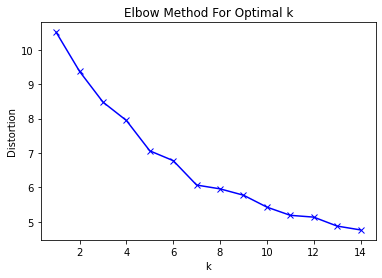

In [76]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(venue_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

<p>Elbow Method indicates we should use 7 clusters</p>

<p>K-Means cluster the venue-grouped dataframe to group stations with similar food-venue preferences</p>

In [77]:
kclusters = 7

venue_grouped_clustering = venue_grouped.drop('Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venue_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1, 1, 3, 1, 0, 1, 0], dtype=int32)

<p>Add new column ClusterLabels containing the appropriate cluster label to the sorted dataframe</p>

In [78]:
# add clustering labels

stations_venues_sorted['ClusterLabels'] = kmeans.labels_
venue_merged = all_stations
#merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
venue_merged = stations_venues_sorted.join(venue_merged.set_index('Station'), on='Station')

venue_merged.head() # check the last columns!

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels,Latitude,Longitude
0,Bathurst,Coffee Shop,Sandwich Place,Pizza Place,Ramen Restaurant,Restaurant,Korean Restaurant,Fried Chicken Joint,Japanese Restaurant,Food,Convenience Store,0,43.665992,-79.411583
1,Bay,Coffee Shop,Bakery,Café,Japanese Restaurant,Gourmet Shop,Burger Joint,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Diner,0,43.670400,-79.390270
2,Bayview,Coffee Shop,Café,Burmese Restaurant,Mediterranean Restaurant,Restaurant,Burger Joint,BBQ Joint,Food,Deli / Bodega,Dessert Shop,0,43.767252,-79.387399
3,Bessarion,Persian Restaurant,Sandwich Place,Pizza Place,Fish Market,Breakfast Spot,Buffet,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega,1,43.769127,-79.376724
4,Broadview,Coffee Shop,Pizza Place,American Restaurant,Mexican Restaurant,Ramen Restaurant,Fast Food Restaurant,Falafel Restaurant,Sandwich Place,Donut Shop,Convenience Store,1,43.676862,-79.358524


<p>Display map of all subway station again with stations colour coded to match cluster members</p>

In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venue_merged['Latitude'], venue_merged['Longitude'], venue_merged['Station'], venue_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    j=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[j-1],
        fill=True,
        fill_color=rainbow[j-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<p>Display all 7 clusters</p>

In [80]:
#First Cluster
venue_merged.loc[venue_merged['ClusterLabels'] == 0, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]]

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels
0,Bathurst,Coffee Shop,Sandwich Place,Pizza Place,Ramen Restaurant,Restaurant,Korean Restaurant,Fried Chicken Joint,Japanese Restaurant,Food,Convenience Store,0
1,Bay,Coffee Shop,Bakery,Café,Japanese Restaurant,Gourmet Shop,Burger Joint,Ethiopian Restaurant,Deli / Bodega,Dessert Shop,Diner,0
2,Bayview,Coffee Shop,Café,Burmese Restaurant,Mediterranean Restaurant,Restaurant,Burger Joint,BBQ Joint,Food,Deli / Bodega,Dessert Shop,0
7,College,Coffee Shop,Thai Restaurant,Fast Food Restaurant,Tea Room,Fried Chicken Joint,Bubble Tea Shop,Eastern European Restaurant,Convenience Store,Cupcake Shop,Deli / Bodega,0
9,Davisville,Coffee Shop,Indian Restaurant,Italian Restaurant,Gastropub,Sushi Restaurant,Sandwich Place,Ethiopian Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,0
10,Don Mills,Coffee Shop,Bakery,Burger Joint,Bar,Frozen Yogurt Shop,Snack Place,Asian Restaurant,Falafel Restaurant,Deli / Bodega,Dessert Shop,0
17,Eglinton,Coffee Shop,Fast Food Restaurant,Buffet,Thai Restaurant,Ramen Restaurant,Café,Bubble Tea Shop,Eastern European Restaurant,Cupcake Shop,Deli / Bodega,0
18,Eglinton West,Juice Bar,Coffee Shop,Mexican Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,0
20,Finch,Coffee Shop,Japanese Restaurant,Korean Restaurant,Food Court,Thai Restaurant,Dessert Shop,Café,Fast Food Restaurant,Cupcake Shop,Deli / Bodega,0
32,Lawrence East,Chaat Place,Indian Restaurant,Coffee Shop,Wings Joint,Ethiopian Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,0


In [81]:
#Second Cluster

venue_merged.loc[venue_merged['ClusterLabels'] == 1, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]]

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels
3,Bessarion,Persian Restaurant,Sandwich Place,Pizza Place,Fish Market,Breakfast Spot,Buffet,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega,1
4,Broadview,Coffee Shop,Pizza Place,American Restaurant,Mexican Restaurant,Ramen Restaurant,Fast Food Restaurant,Falafel Restaurant,Sandwich Place,Donut Shop,Convenience Store,1
6,Christie,Korean Restaurant,Sandwich Place,Chinese Restaurant,Pub,Ice Cream Shop,Indian Restaurant,Bubble Tea Shop,Ramen Restaurant,Coffee Shop,Wings Joint,1
8,Coxwell,Fast Food Restaurant,Pizza Place,African Restaurant,Mediterranean Restaurant,Restaurant,Sandwich Place,Breakfast Spot,Coffee Shop,Filipino Restaurant,Food,1
15,Dundas West,Coffee Shop,Shawarma Place,Chinese Restaurant,BBQ Joint,Pizza Place,Deli / Bodega,Sushi Restaurant,Breakfast Spot,Eastern European Restaurant,Ethiopian Restaurant,1
22,Greenwood,Coffee Shop,Café,African Restaurant,Bakery,Ethiopian Restaurant,Bar,Chinese Restaurant,Thai Restaurant,Bagel Shop,Fast Food Restaurant,1
25,Jane,Pizza Place,Modern European Restaurant,Bakery,Dessert Shop,Mediterranean Restaurant,Sandwich Place,Coffee Shop,Wings Joint,Dumpling Restaurant,Cupcake Shop,1
26,Keele,Pizza Place,Sushi Restaurant,Coffee Shop,Café,Breakfast Spot,Restaurant,Sandwich Place,Dumpling Restaurant,Convenience Store,Cupcake Shop,1
27,Kennedy,Pizza Place,Chinese Restaurant,Grocery Store,Bakery,Dessert Shop,Sri Lankan Restaurant,Indian Restaurant,Filipino Restaurant,Coffee Shop,Eastern European Restaurant,1
29,Kipling,Coffee Shop,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Sushi Restaurant,Fast Food Restaurant,Diner,Restaurant,Burger Joint,Dumpling Restaurant,1


In [82]:
#Third Cluster

venue_merged.loc[venue_merged['ClusterLabels'] == 2, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]]

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels
12,Downsview,Café,Wings Joint,Coffee Shop,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,2


In [83]:
#Fourth Cluster

venue_merged.loc[venue_merged['ClusterLabels'] == 3, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]]

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels
5,Chester,Greek Restaurant,Café,Fried Chicken Joint,Juice Bar,Bakery,Sushi Restaurant,Deli / Bodega,Dessert Shop,Diner,Donut Shop,3
11,Donlands,Pizza Place,Fried Chicken Joint,Asian Restaurant,Coffee Shop,Gastropub,Beer Bar,Caribbean Restaurant,Burger Joint,Café,Ethiopian Restaurant,3
13,Dufferin,Vietnamese Restaurant,African Restaurant,Fried Chicken Joint,Pizza Place,Hot Dog Joint,Mexican Restaurant,Fast Food Restaurant,Café,Coffee Shop,Donut Shop,3
14,Dundas,Burger Joint,Dessert Shop,Asian Restaurant,Grocery Store,Bakery,Mexican Restaurant,Bubble Tea Shop,Filipino Restaurant,Ramen Restaurant,Italian Restaurant,3
16,Dupont,Restaurant,Frozen Yogurt Shop,Burger Joint,Middle Eastern Restaurant,Donut Shop,Café,Sandwich Place,Japanese Restaurant,Coffee Shop,Fast Food Restaurant,3
21,Glencairn,Vegetarian / Vegan Restaurant,Asian Restaurant,Sushi Restaurant,Filipino Restaurant,Café,Coffee Shop,Italian Restaurant,Japanese Restaurant,Wings Joint,Eastern European Restaurant,3
23,High Park,Food Truck,Deli / Bodega,Restaurant,Café,Italian Restaurant,Japanese Restaurant,Wings Joint,Eastern European Restaurant,Cupcake Shop,Dessert Shop,3
24,Islington,Bakery,Fast Food Restaurant,Food Court,Thai Restaurant,Sushi Restaurant,Caribbean Restaurant,Café,Coffee Shop,Eastern European Restaurant,Cupcake Shop,3
28,King,Irish Pub,Vegetarian / Vegan Restaurant,Gastropub,Pizza Place,Poke Place,Fast Food Restaurant,Breakfast Spot,Café,Restaurant,Japanese Restaurant,3
30,Lansdowne,Café,Sandwich Place,Fried Chicken Joint,Pizza Place,Mexican Restaurant,Filipino Restaurant,Restaurant,Italian Restaurant,Coffee Shop,Wings Joint,3


In [84]:
#Fifth Cluster

venue_merged.loc[venue_merged['ClusterLabels'] == 4, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]]

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels
19,Ellesmere,Hot Dog Joint,Japanese Restaurant,Wings Joint,Falafel Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,4


In [85]:
#Sixth Cluster

venue_merged.loc[venue_merged['ClusterLabels'] == 5, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]]

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels
40,Old Mill,American Restaurant,Wings Joint,Falafel Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,5


In [86]:
#Seventh Cluster

venue_merged.loc[venue_merged['ClusterLabels'] == 6, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]]

,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels
60,Warden,Bakery,Chinese Restaurant,Wings Joint,Falafel Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,6


<p>As the First cluster is already dominated by Coffee Shops and the Third, Fifth, Sixth and Seventh clusters contain outliers, I will focus on the Second and Fourth clusters</p>

<p>Compare the average rank of Coffee Shops in both of the clusters in order to determine where they typically perform best</p>

In [87]:
#Calculates and prints the average rank of "Coffee Shop" in the Second cluster
clust1=venue_merged.loc[venue_merged['ClusterLabels'] == 1, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]].to_numpy()
clust1[1][1]
mydf = pd.DataFrame(columns=['type', 'rank'])
myint = 0
for i in range(clust1.shape[0]):
    for j in range(clust1.shape[1]-2):
        mydf.loc[myint] = [clust1[i][j+1]] + [j+1]
        myint=myint+1
avgRank=0
counter=0
for cat, rank in zip(mydf['type'], mydf['rank']):
    if(cat=="Coffee Shop"):
        counter=counter+1
        avgRank=avgRank+rank
avgRank=avgRank/counter
print('The average rank of "Coffee Shop" in second cluster is: ' + str(avgRank))

The average rank of "Coffee Shop" in second cluster is: 4.384615384615385


In [88]:
#Calculates and prints the average rank of "Coffee Shop" in the Fourth cluster

clust3=venue_merged.loc[venue_merged['ClusterLabels'] == 3, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]].to_numpy()
clust3[1][1]
mydf = pd.DataFrame(columns=['type', 'rank'])
myint = 0
for i in range(clust3.shape[0]):
    for j in range(clust3.shape[1]-2):
        mydf.loc[myint] = [clust3[i][j+1]] + [j+1]
        myint=myint+1
avgRank=0
counter=0
for cat, rank in zip(mydf['type'], mydf['rank']):
    if(cat=="Coffee Shop"):
        counter=counter+1
        avgRank=avgRank+rank
avgRank=avgRank/counter
print('The average rank of "Coffee Shop" in the fourth cluster is: ' + str(avgRank))

The average rank of "Coffee Shop" in the fourth cluster is: 6.333333333333333


<p>Coffee Shops in the fourth cluster appear to outperform those in the second cluster therefore, I will focus on the fourth cluster as possible stations to expand to</p>

<p>From fourth cluster stations, drop those that already contain a Coffee Shop</p>

In [89]:
focusedClust=venue_merged.loc[venue_merged['ClusterLabels'] == 3, venue_merged.columns[[0] + list(range(1, venue_merged.shape[1]-2))]]
#Remove all rows that have a column value of "Coffee Shop"
focusedClust = focusedClust[~focusedClust.eq("Coffee Shop").any(1)]
focusedClust

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Station,1st Most Popular Venue Type,2nd Most Popular Venue Type,3rd Most Popular Venue Type,4th Most Popular Venue Type,5th Most Popular Venue Type,6th Most Popular Venue Type,7th Most Popular Venue Type,8th Most Popular Venue Type,9th Most Popular Venue Type,10th Most Popular Venue Type,ClusterLabels
5,Chester,Greek Restaurant,Café,Fried Chicken Joint,Juice Bar,Bakery,Sushi Restaurant,Deli / Bodega,Dessert Shop,Diner,Donut Shop,3
14,Dundas,Burger Joint,Dessert Shop,Asian Restaurant,Grocery Store,Bakery,Mexican Restaurant,Bubble Tea Shop,Filipino Restaurant,Ramen Restaurant,Italian Restaurant,3
23,High Park,Food Truck,Deli / Bodega,Restaurant,Café,Italian Restaurant,Japanese Restaurant,Wings Joint,Eastern European Restaurant,Cupcake Shop,Dessert Shop,3
28,King,Irish Pub,Vegetarian / Vegan Restaurant,Gastropub,Pizza Place,Poke Place,Fast Food Restaurant,Breakfast Spot,Café,Restaurant,Japanese Restaurant,3
42,Ossington,Café,Vietnamese Restaurant,Cupcake Shop,Turkish Home Cooking Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Fast Food Restaurant,South American Restaurant,Ethiopian Restaurant,Wings Joint,3
47,Royal York,Sushi Restaurant,Italian Restaurant,Sandwich Place,Gastropub,Café,Restaurant,Seafood Restaurant,Wings Joint,Convenience Store,Cupcake Shop,3
54,St Clair,Burger Joint,Grocery Store,Pizza Place,Cantonese Restaurant,Italian Restaurant,New American Restaurant,Modern European Restaurant,Vietnamese Restaurant,Gastropub,Bagel Shop,3
62,Wilson,Fast Food Restaurant,Modern European Restaurant,Café,Salad Place,Italian Restaurant,Mediterranean Restaurant,Wings Joint,Dumpling Restaurant,Cupcake Shop,Deli / Bodega,3


<p>These are the stations that I would recommend a Coffee Shop like Tim Horton's or Starbucks to expand within 250 meters of, as it is likely the new location will be popular</p>

<p>Lastly, map my recommended stations for Coffee Shop expansion</p>

In [90]:
stationNames=focusedClust['Station'].to_numpy()
map_expand = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, station in zip(all_stations['Latitude'], all_stations['Longitude'], all_stations['Station']):
    if(station in stationNames):
        label = '{}'.format(station)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_expand)  
    
map_expand

<p>In conclusion, I recommend a Coffee Shop to setup a location within 250 meters of the following subway stations in Toronto: Chester, Dundas, High Park, King, Ossington, Royal York, St Clair, Wilson</p>